# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

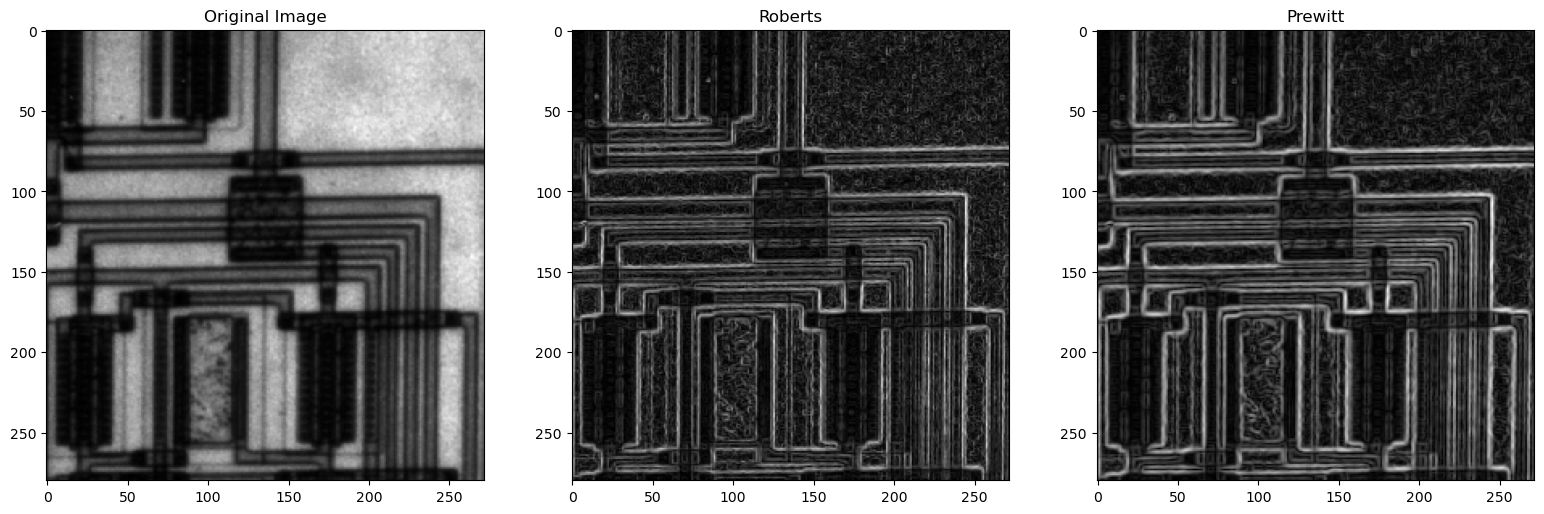

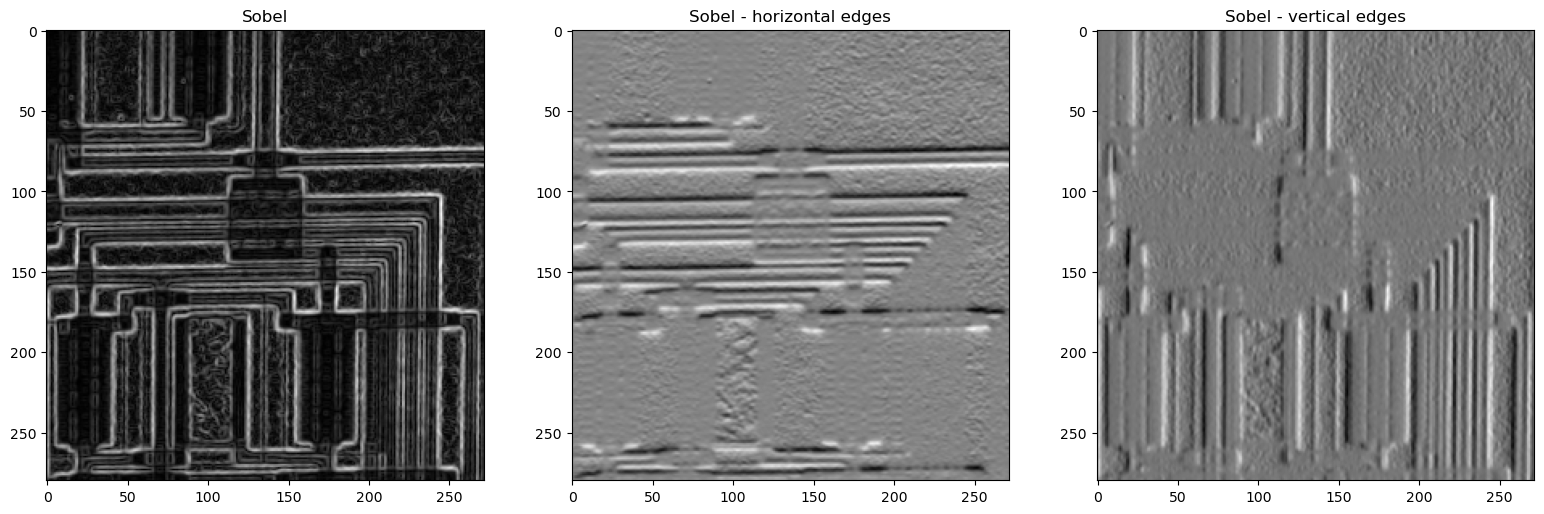

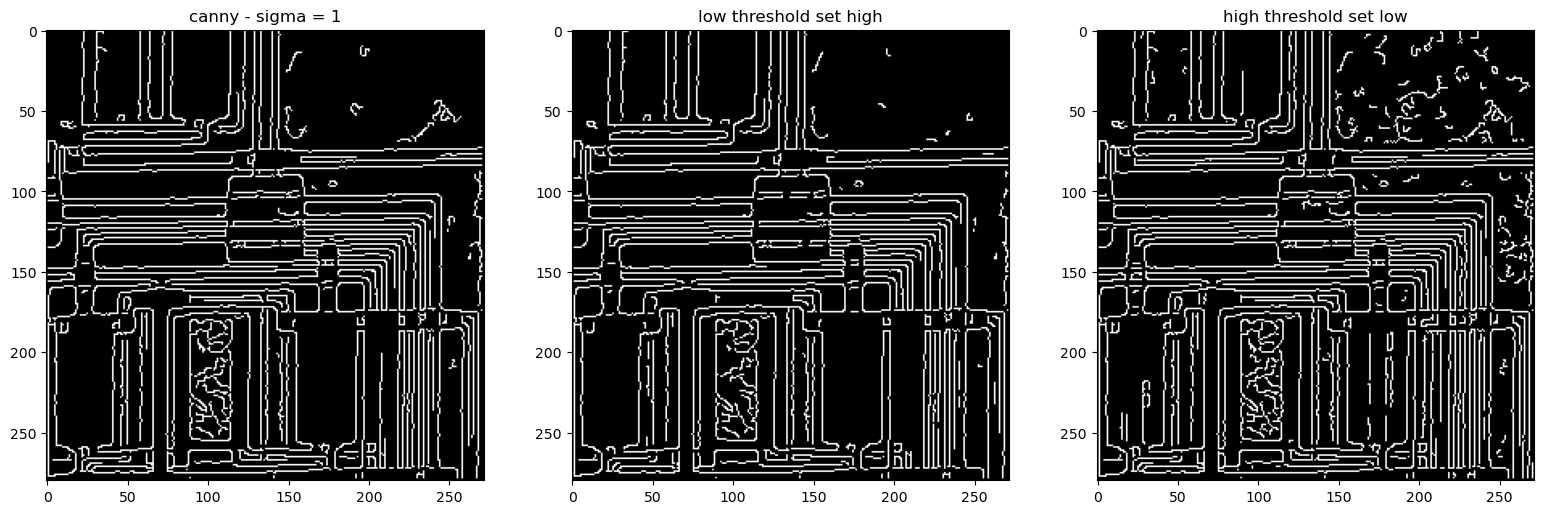

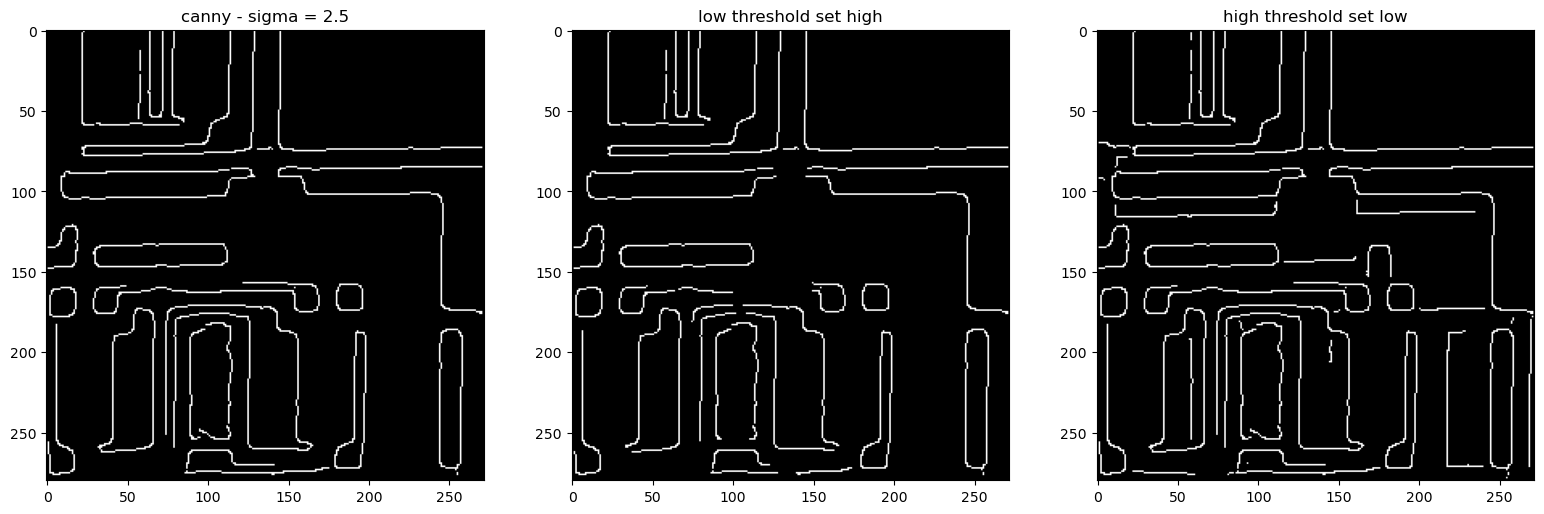

In [4]:
# 1. Built-in Sobel, Prewill, Roberts, Canny
from skimage.filters import roberts, sobel, sobel_h, sobel_v, prewitt
from skimage.feature import canny

img = io.imread('circuit.tif')
roberts_img = roberts(img)
prewitt_img = prewitt(img)
sobel_img = sobel(img)
sobel_h_img = sobel_h(img)
sobel_v_img = sobel_v(img)
canny_img_1 = canny(img, )
canny_img_1_lowT = canny(img, low_threshold=38)
canny_img_1_highT = canny(img, high_threshold=40)
canny_img_3 = canny(img, sigma=2.5)
canny_img_3_lowT = canny(img, sigma=2.5, low_threshold=38)
canny_img_3_highT = canny(img, sigma=2.5, high_threshold=40)

show_images([img, roberts_img, prewitt_img], ['Original Image', 'Roberts', 'Prewitt'])
show_images([sobel_img, sobel_h_img, sobel_v_img], ['Sobel', 'Sobel - horizontal edges', 'Sobel - vertical edges'])
show_images([canny_img_1, canny_img_1_lowT, canny_img_1_highT], ['canny - sigma = 1', 'low threshold set high', 'high threshold set low'])
show_images([canny_img_3, canny_img_3_lowT, canny_img_3_highT], ['canny - sigma = 2.5', 'low threshold set high', 'high threshold set low'])



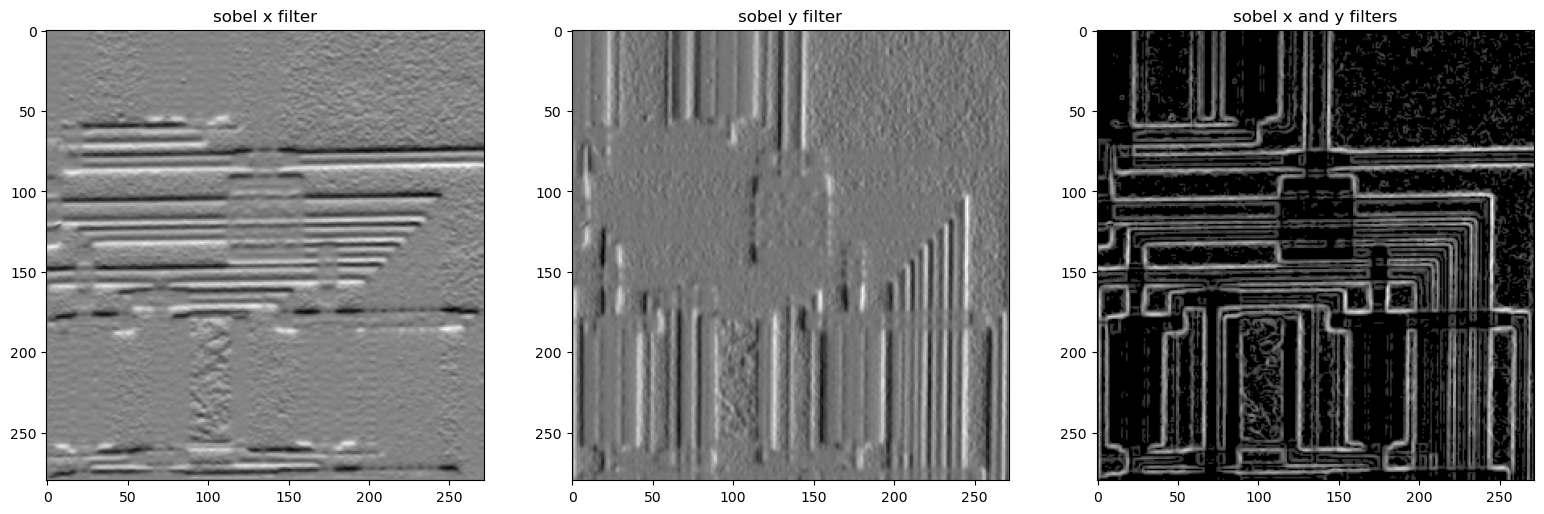

In [37]:
# 2. Custom Sobel (V-H-Both)
hx = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
hy = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
threshold = 50

sobel_x = np.zeros_like(img, dtype=float)
sobel_y = np.zeros_like(img, dtype=float)
sobel_xy = np.zeros_like(img, dtype=float)

padded_img = np.pad(img, pad_width=1, mode='reflect')

for i in range(1, padded_img.shape[0] - 1):
    for j in range(1, padded_img.shape[1] - 1):
        region = padded_img[i-1:i+2, j-1:j+2]
        sobel_x[i-1, j-1] = np.sum(region * hx)
        sobel_y[i-1, j-1] = np.sum(region * hy)

for i in range(0, sobel_x.shape[0]):
    for j in range(0, sobel_x.shape[1]):
        edge_strength = np.sqrt((sobel_x[i, j] ** 2) + (sobel_y[i, j] ** 2))
        if edge_strength >= threshold:
            sobel_xy[i, j] = edge_strength

show_images([sobel_x, sobel_y, sobel_xy], ['sobel x filter', 'sobel y filter', 'sobel x and y filters'])



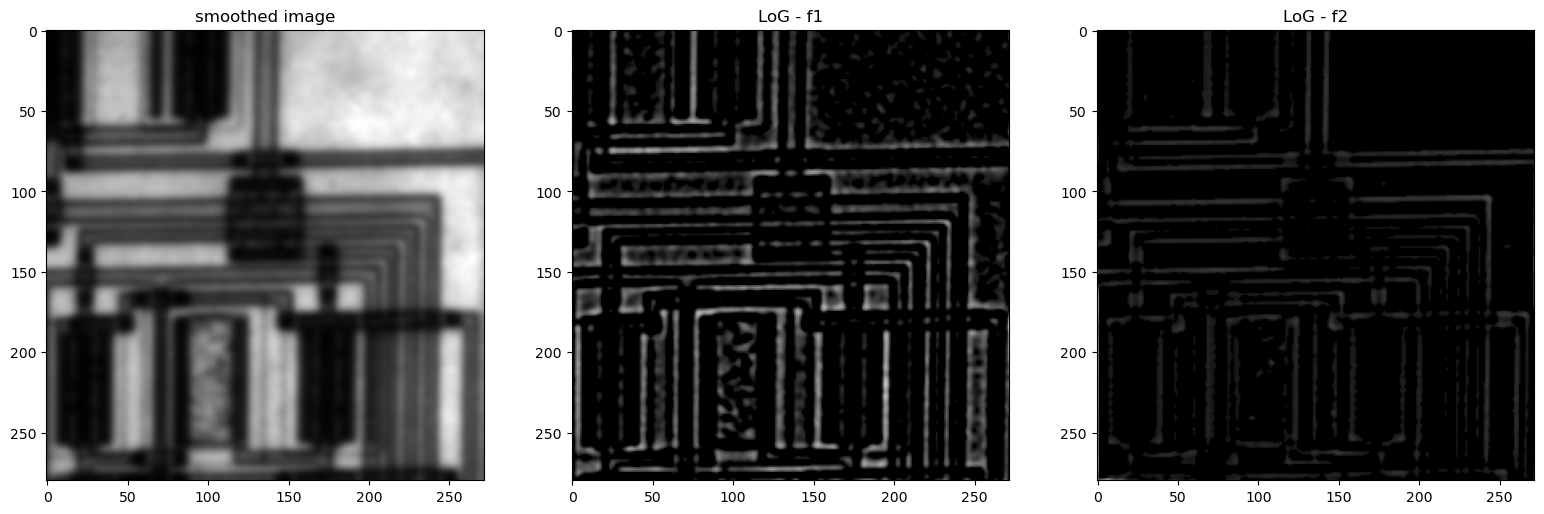

In [93]:
# 3. Custom LoG
from skimage.filters import gaussian

thres= 2
f1 = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
f2 = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
smooth_img = gaussian(img, sigma=2)

f1_img = np.zeros_like(img, dtype=float)
f2_img = np.zeros_like(img, dtype=float)

padded_img = np.pad(smooth_img, pad_width=1, mode='reflect')

for i in range(1, padded_img.shape[0] - 1):
    for j in range(1, padded_img.shape[1] - 1):
        region = padded_img[i-1:i+2, j-1:j+2] * 255
        f1_edge_strength = np.sum(region * f1)
        f2_edge_strength = np.sum(region * f2)

        if f1_edge_strength >= thres:
            f1_img[i-1, j-1] = f1_edge_strength

        if f2_edge_strength >= thres:
            f2_img[i-1, j-1] = f2_edge_strength

show_images([smooth_img, f1_img, f2_img], ['smoothed image', 'LoG - f1', 'LoG - f2'])



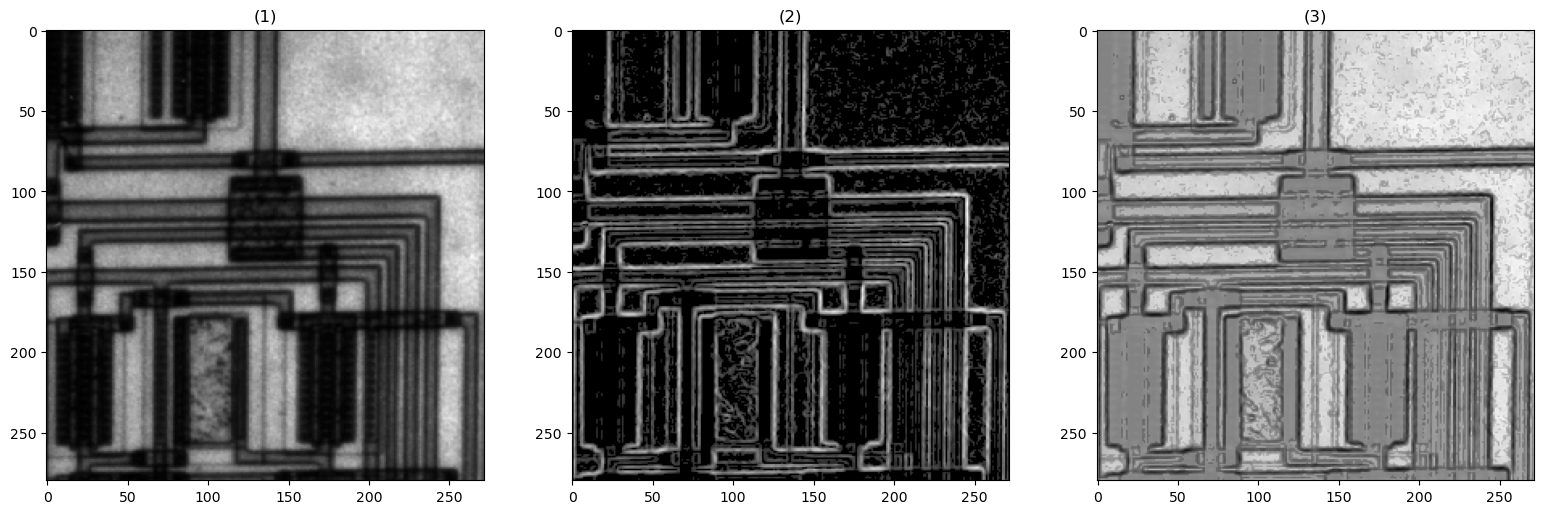

In [89]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
new_img = img - 0.8 * sobel_xy
show_images([img, sobel_xy, new_img])